## <span style='color:blue '> Projet 3, OpenFoodFacts, Notebook du nettoyage </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [3]:
import gc
gc.collect()

44

### Chargement Dataset


#### Description du jeu de données : https://world.openfoodfacts.org/data/data-fields.txt

In [4]:
data =pd.read_csv('en.openfoodfacts.org.products.csv',delimiter='\t' , error_bad_lines=False)

C:\Users\sahel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,27,28,29,31,38,47,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### <span style='color:green '> Analyse de la forme </span>

In [96]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7

In [6]:
data.shape

(1806889, 186)

Notre base de données comporte 1806889 ligne et 186 colonnes.

In [7]:
print("Names of the columns :", list(data))

Names of the columns : ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ing

### Nombre des doublons

In [8]:
data.duplicated(keep=False).sum() 

2

2 doublons se trouve dans ce tableau

### Nombre des colonnes "Unnamed":

In [9]:
data.columns.str.match("Unnamed").sum()

0

Aucune colonne intitulé "Unnamed" se trouve dans ce data frame

### Nombre des NaN(%)

In [10]:
100*(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

code                                            0.000000
url                                             0.000000
created_t                                       0.000000
created_datetime                                0.000000
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
states                                          0.000000
states_tags                                     0.000000
states_en                                       0.000000
creator                                         0.000221
pnns_groups_2                                   0.023908
countries                                       0.308099
countries_tags                                  0.308375
countries_en                                    0.308375
pnns_groups_1                                   0.939183
product_name                                    4.319690
energy_100g                                    20.592632
proteins_100g                  

Il y a un nombre important de données manquantes dans le data frame. 5 colonnes sont remplies entièrement "NaN". Nous allons supprimer ces 5 lignes.

### Suppression des colonnes et des lignes entièrement "NaN"

In [11]:
data.dropna(how='all', axis='columns', inplace = True)

In [12]:
data.dropna(how='all', axis='rows', inplace = True)

In [13]:
data.shape

(1806889, 181)

En ce qui concerne les lignes, aucune ligne était entièrement "NaN"

### Visualisation des données manquantes(Quantité de données manquantes par colonne)

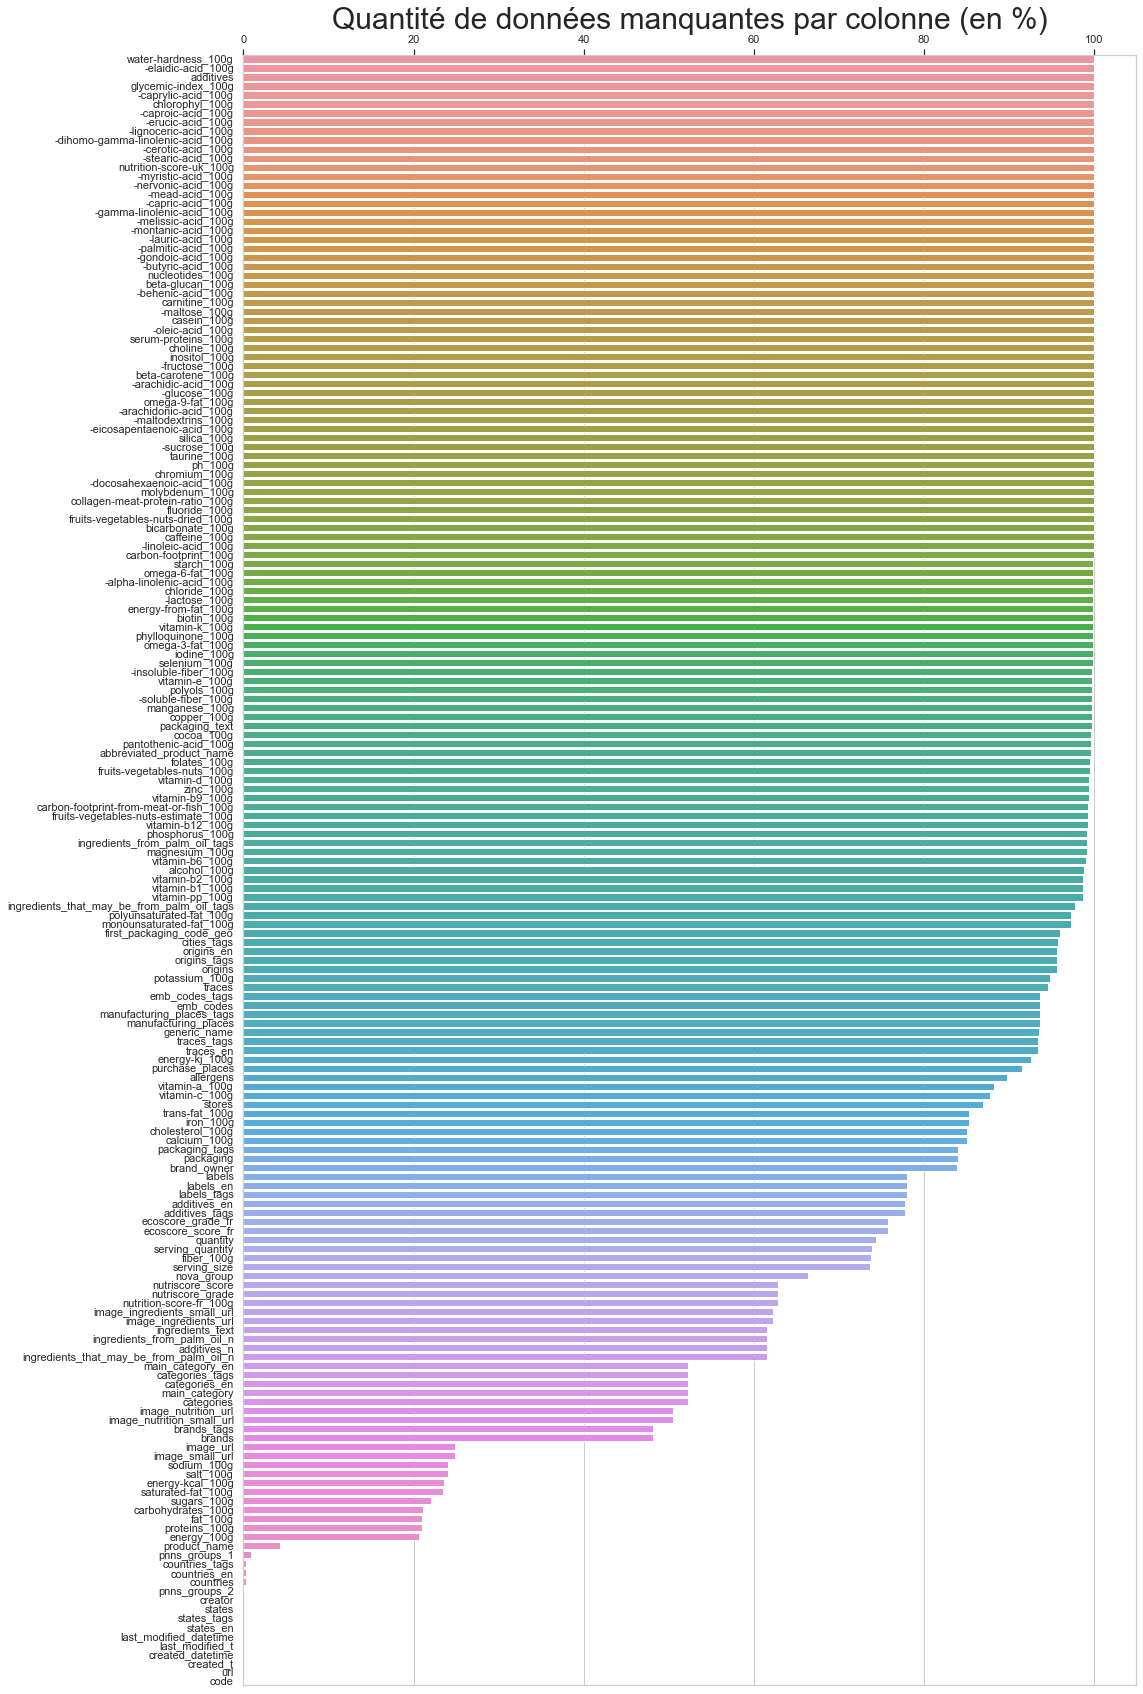

In [14]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne (en %)', size=30)
plt.show()

In [15]:
data.describe(include= 'O').T.head(150)

,count,unique,top,freq
code,1806889,1806651,84909900098,3
url,1806889,1806884,http://world-en.openfoodfacts.org/product/3560...,2
creator,1806885,13664,kiliweb,1023138
created_datetime,1806889,1556349,2020-04-23T17:22:07Z,28
last_modified_datetime,1806889,1404440,2021-05-01T11:16:01Z,209
product_name,1728837,1133944,Aceite de oliva virgen extra,1270
abbreviated_product_name,6211,6071,"6x27,5cl tourtel twi",9
generic_name,116869,84724,Pâtes alimentaires de qualité supérieure,285
quantity,463089,35774,500 g,20061
packaging,288425,51943,Kunststoff,6610


In [16]:
data.describe(include= 'O').T.tail(40)

,count,unique,top,freq
manufacturing_places_tags,114931,23825,france,25335
labels,397018,79808,Organic,23883
labels_tags,397037,57279,en:organic,46416
labels_en,397037,57191,Organic,46416
emb_codes,114918,31565,FSC-C014047,1380
emb_codes_tags,114887,27496,fsc-c014047,1392
first_packaging_code_geo,70701,3659,"47.833333,-0.333333",1212
cities_tags,76171,6850,sable-sur-sarthe-sarthe-france,967
purchase_places,152586,10906,France,42040
stores,236006,14337,Carrefour,23676


### Type des colonnes

In [17]:
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                       int64
created_datetime                               object
last_modified_t                                 int64
last_modified_datetime                         object
product_name                                   object
abbreviated_product_name                       object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
packaging_text                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_en               

In [18]:
float = data.select_dtypes(include=['float64'])
float.shape

(1806889, 118)

In [19]:
int = data.select_dtypes(include=['int64'])
int.shape

(1806889, 2)

In [20]:
object = data.select_dtypes(include=['object'])
object.shape

(1806889, 61)

### <span style='color:green '>Traiter le jeu de données afin de repérer les variables pertinentes pour l'idée de l'application </span>

In [21]:
data['categories'].str.contains('Fromages').sum()

21300

In [22]:
data.loc[data["categories"]=='Fromages'].sum()

code                                                                             14194018974936
url                                           http://world-en.openfoodfacts.org/product/2480...
creator                                              kiliwebnutrinet-santekiliwebkiliwebkiliweb
created_t                                                                            7749278191
created_datetime                              2020-01-24T20:16:53Z2021-02-10T19:16:46Z2017-1...
last_modified_t                                                                      8101270435
last_modified_datetime                        2021-05-06T07:50:51Z2021-05-06T07:50:17Z2021-0...
abbreviated_product_name                                                                      0
generic_name                                                                                  0
packaging_text                                                                                0
brands                                  

In [23]:
data['main_category'].str.contains('en:cheeses').sum()

14890

In [24]:
data.loc[data['main_category']== 'en:cheeses'].sum()

url                                        http://world-en.openfoodfacts.org/product/0000...
creator                                    kiliwebkiliwebopenfoodfacts-contributorsusda-n...
created_t                                                                     22654261230069
created_datetime                           2020-09-09T13:24:09Z2019-10-27T11:58:39Z2021-0...
last_modified_t                                                               23380271156853
last_modified_datetime                     2020-12-12T17:49:34Z2020-12-12T17:20:29Z2021-0...
categories                                 Produits laitiers, Produits fermentés, Produit...
categories_tags                            en:dairies,en:fermented-foods,en:fermented-mil...
categories_en                              Dairies,Fermented foods,Fermented milk product...
serving_quantity                                                                      425779
additives_n                                                           

Parmi les deux colonnes « main_category » et « categories », nous choisissons « main_category », cars dans cette colonne, les variables qui nous semblent pertinentes selon l'idée de l'application, sont plus complètes. 

Nous construisons notre nouveau data frame

In [25]:
df_fromages = data.loc[data['main_category']== 'en:cheeses']

In [26]:
df_fromages.shape

(14712, 181)

### Nombre de données manquantes dans notre nouveau data frame

In [27]:
100*(df_fromages.isna().sum()/df_fromages.shape[0]).sort_values(ascending=True)

code                                            0.000000
pnns_groups_1                                   0.000000
pnns_groups_2                                   0.000000
states                                          0.000000
states_tags                                     0.000000
states_en                                       0.000000
main_category                                   0.000000
categories_tags                                 0.000000
categories                                      0.000000
main_category_en                                0.000000
categories_en                                   0.000000
last_modified_t                                 0.000000
url                                             0.000000
creator                                         0.000000
created_t                                       0.000000
last_modified_datetime                          0.000000
created_datetime                                0.000000
ecoscore_grade_fr              

### <span style='color:green '>Traitement des valeurs manquantes et aberrantes dans notre nouveau data frame</span>

### Parmi les variables, on conserve les variables suivantes : 
-	Celles qui nous semble pertinentes pour l'idée de l'application, et
-	Celles avec moins de 25% de valeurs manquantes (au-delà de 25% nous semble risqué ):


### Les axes d’analyse : (les variables catégoriques)
 - pnns_groups_2, categories, main_category, countries_en, nutriscore_grade

### Les variables numeriques avec moins de 15% de valeurs manquantes
 - 'fat_100g', 'proteins_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'sugars_100g', 'nutriscore_score'                                           
 
Après le traitement des valeurs manquantes et aberrantes, pour les variables avec moins de 15% de valeurs manquantes, on va faire une imputation par la moyenne par groupes homogènes.                                   

### Les variables numerique avec 16 à 25% de valeurs manquantes :
 - 'fiber_100g', 'calcium_100g', 'cholesterol_100g'                                                                   

Pour les variables avec beaucoup des valeurs manquantes, on va faire une imputation par KNN. 

### Visualisation des données manquantes de nouveau data frame

<AxesSubplot:>

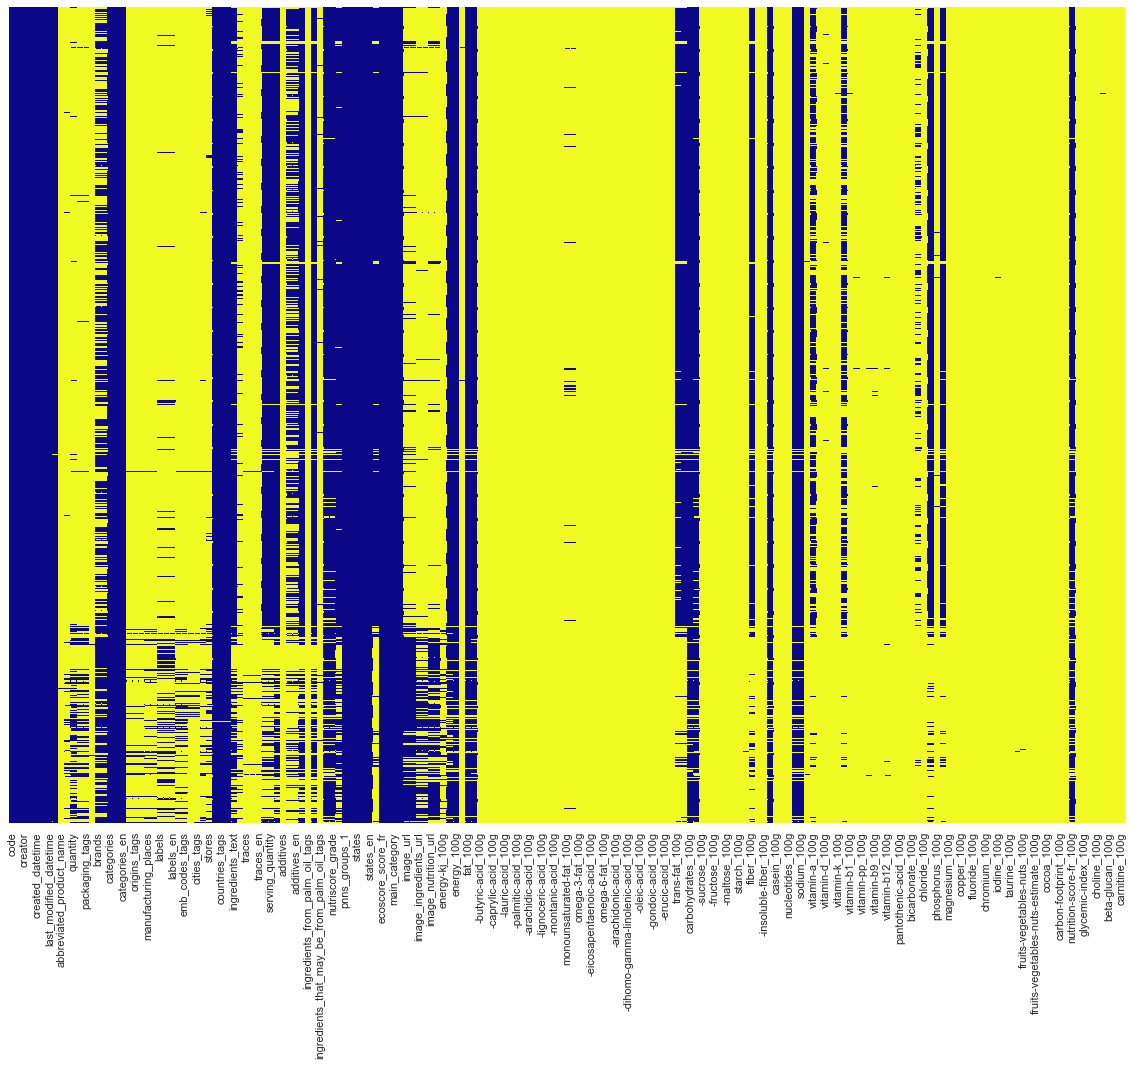

In [28]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_fromages.isna(), yticklabels=False, cbar=False, cmap='plasma')

### Nombre des doublons dans le nouveau data frame

In [29]:
df_fromages.duplicated(keep=False).sum() 

0

Les doublons dans ce data frame sont éliminés

### Suppression des colonnes et des lignes entièrement "NaN"

In [30]:
df_fromages.dropna(how='all', axis='columns', inplace = True)

<ipython-input-30-32244c8595f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fromages.dropna(how='all', axis='columns', inplace = True)


In [31]:
df_fromages.dropna(how='all', axis='rows', inplace = True)

<ipython-input-31-795c9f210570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fromages.dropna(how='all', axis='rows', inplace = True)


In [32]:
df_fromages.shape

(14712, 123)

58 colonnes sont supprimées

In [33]:
import gc
gc.collect()

103

In [34]:
df_fromages.describe(include= 'O').T.head(80)

,count,unique,top,freq
code,14712,14712,673803042814,1
url,14712,14712,http://world-en.openfoodfacts.org/product/0626...,1
creator,14712,345,usda-ndb-import,5757
created_datetime,14712,10441,2017-03-09T10:37:02Z,12
last_modified_datetime,14712,10456,2020-04-22T21:10:25Z,11
product_name,14645,10253,Cottage cheese,81
abbreviated_product_name,10,10,Boursin afh+ poivre 2x150g 2019,1
generic_name,460,371,Queso de mezcla madurado,13
quantity,1987,460,200 g,204
packaging,1247,506,Kunststoff,140


In [35]:
df_fromages.describe(include= 'O').T.tail(40)

,count,unique,top,freq
manufacturing_places,531,312,France,39
manufacturing_places_tags,531,296,france,44
labels,1595,551,Organic,255
labels_tags,1595,398,en:organic,277
labels_en,1595,397,Organic,277
emb_codes,1048,663,ES 15.00264/ZA EC,30
emb_codes_tags,1048,579,es-15-00264-za-ec,31
first_packaging_code_geo,322,155,"48.166667,-0.4",9
cities_tags,333,183,evron-mayenne-france,8
purchase_places,620,216,France,75


In [36]:
df=df_fromages.loc[df_fromages["countries_en"]=='France']

In [37]:
df[["product_name","main_category"]]

,product_name,main_category
75,Le rogallais chèvre brebis,en:cheeses
864,La meule,en:cheeses
1917,Le cremeux,en:cheeses
2015,BROUSSE ALLEGEE EN MG,en:cheeses
34712,Red leicester,en:cheeses
36668,Kraft Grated Parmesan Cheese,en:cheeses
46629,Smoked ham cheddar,en:cheeses
66658,Grated English Medium Cheddar,en:cheeses
125541,Sliced jarlsberg,en:cheeses
128702,Blacksticks Blue,en:cheeses


In [124]:
df.shape

(917, 123)

Les données contiennent 917 variétés de fromages en France

### Suppression des colonnes non-pertinentes selon l'idée de l'application


In [38]:
columns_useless = [
    'url','brands','brand_owner','brands_tags','code','generic_name',
    'creator','created_t',
    'image_url',
    'image_small_url',
    'image_ingredients_url',
    'image_ingredients_small_url',
    'image_nutrition_url',
    'image_nutrition_small_url',
    'created_datetime',
    'last_modified_datetime','serving_size','serving_quantity', 
    'last_modified_t',
    'states','states_tags',
    'vitamin-a_100g','vitamin-c_100g','ingredients_from_palm_oil_n','iron_100g','energy-kj_100g','energy-kcal_100g',
    'polyunsaturated-fat_100g','trans-fat_100g','monounsaturated-fat_100g',
    'nutrition-score-fr_100g','ecoscore_score_fr','ecoscore_grade_fr','additives_en','allergens',
    'states_en','first_packaging_code_geo']

df_fromages_clean = df_fromages.drop(columns=columns_useless)

In [39]:
df_fromages_clean.shape

(14712, 86)

### Suppression des colonnes avec plus de 80 % de données manquantes

In [40]:
column_with_nan =df_fromages_clean.columns[df_fromages_clean.isnull().any()]

In [41]:
for column in column_with_nan:
    if df_fromages_clean[column].isnull().sum()*100.0/df_fromages_clean.shape[0] > 80:
        df_fromages_clean.drop(column,1, inplace=True)
df_fromages_clean.shape

(14712, 29)

### Suppression des colonnes contenant de l'information en doublon

countries','countries_tags','categories_tags','main_category_en','categories_en','additives_tags', 'ingredients_that_may_be_from_palm_oil_n', 'pnns_groups_1',

In [42]:
df_fromages_clean.drop(columns=['countries','countries_tags','categories_tags','main_category_en','categories_en','additives_tags',
       'ingredients_that_may_be_from_palm_oil_n','pnns_groups_1'],inplace=True)

In [43]:
df_fromages_clean.shape

(14712, 21)

### Quantité de données manquantes par colonne après le nettoyage des données

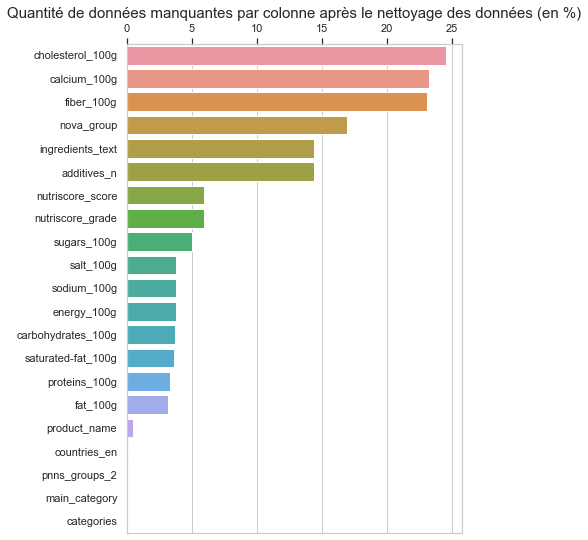

In [44]:
proportion_nan = df_fromages_clean.isna().sum().divide(df_fromages_clean.shape[0]/100).sort_values(ascending=False)


sns.set(style="whitegrid")
plt.figure(figsize=(6, 9))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne après le nettoyage des données (en %)', size=15)
plt.show()

### Vérification des types

In [45]:
df_fromages_clean.dtypes

product_name           object
categories             object
countries_en           object
ingredients_text       object
additives_n           float64
nutriscore_score      float64
nutriscore_grade       object
nova_group            float64
pnns_groups_2          object
main_category          object
energy_100g           float64
fat_100g              float64
saturated-fat_100g    float64
cholesterol_100g      float64
carbohydrates_100g    float64
sugars_100g           float64
fiber_100g            float64
proteins_100g         float64
salt_100g             float64
sodium_100g           float64
calcium_100g          float64
dtype: object

Les types des variables correspondent à un type approprié

In [46]:
float = df_fromages_clean.select_dtypes(include=['float64'])
float.shape

(14712, 14)

In [47]:
int = df_fromages_clean.select_dtypes(include=['int64'])
int.shape

(14712, 0)

In [48]:
object = df_fromages_clean.select_dtypes(include=['object'])
object.shape

(14712, 7)

### <span style='color:green '> Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement </span>

### Visualiser la forme de la distribution des variables numériques

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


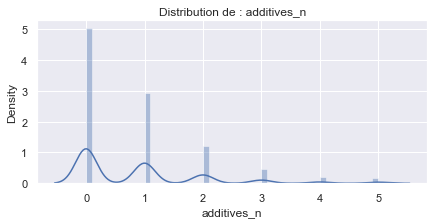

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


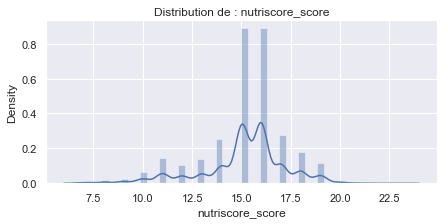

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


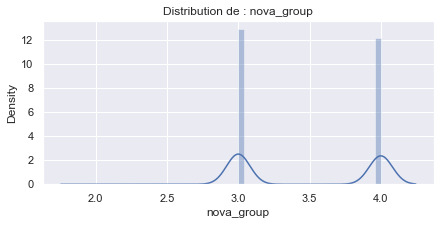

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


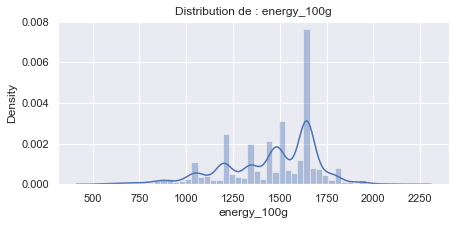

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


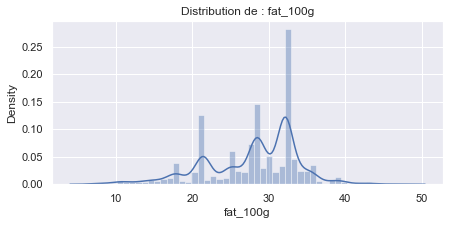

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


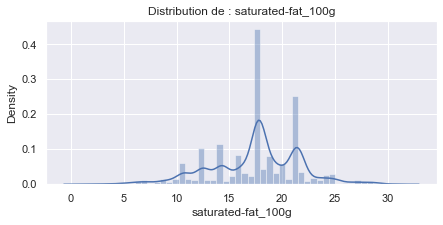

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


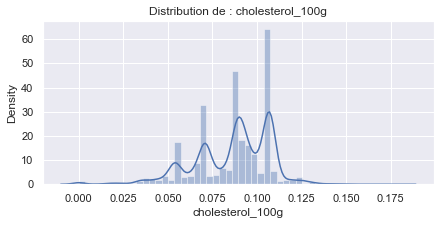

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


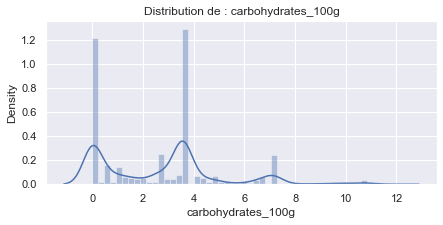

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


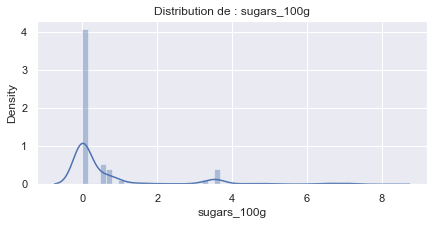

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


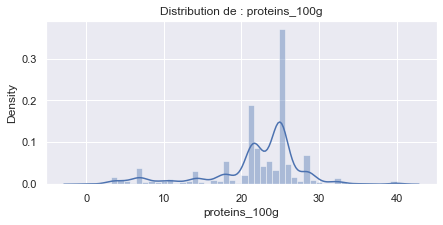

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


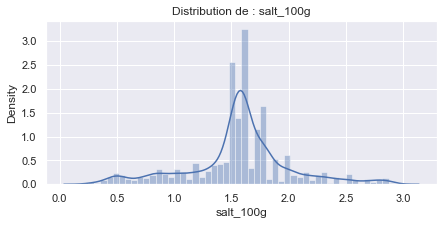

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


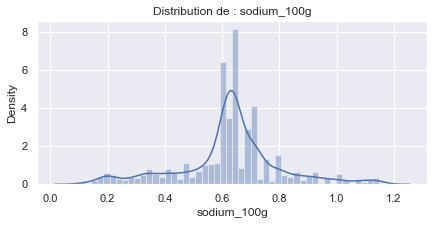

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


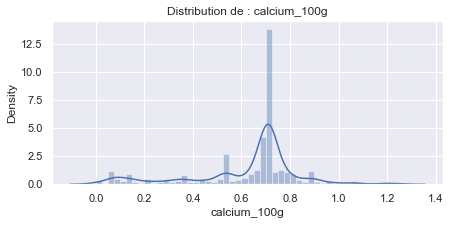

In [95]:
numeric_columns = df_fromages_clean.select_dtypes(include = ['float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (7,3))
    sns.set(font_scale=1)
    sns.distplot(df_fromages_clean[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

Les graphiques nous montrent comment les valeurs des variables sont distribuées. 

Selon ces graphiques :
- On observe que les valeurs de la variable « fibre_100g » sont majoritairement égale à 0. Ce qui est normale selon notre data frame qui ne contient que le fromage. De ce fait, une imputation par knn sur cette variable ne semble pas utile. On va la supprimer.  


In [50]:
df_fromages_clean.drop('fiber_100g',axis=1, inplace=True)

### <span style='color:blue '> Detecter les valeurs aberrantes </span>

### Visualisation des valeurs aberrantes à l'aide des "Boîtes à moustaches" 

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


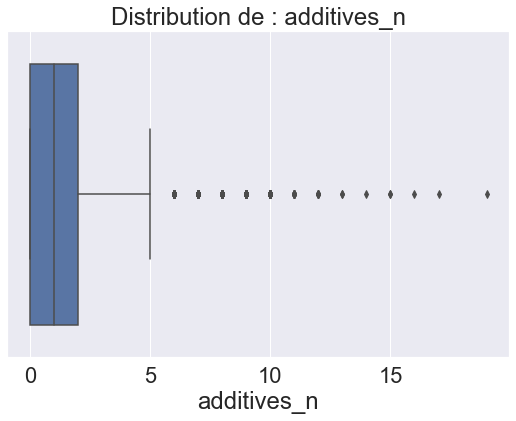

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


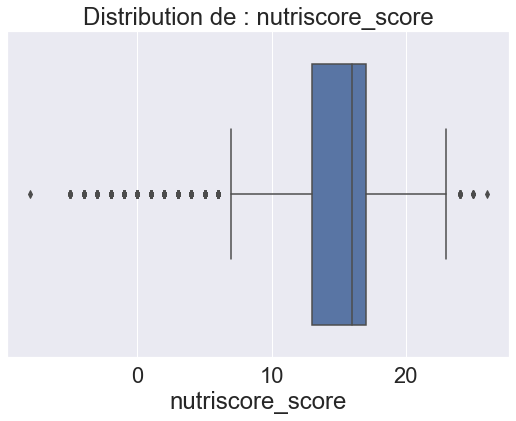

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


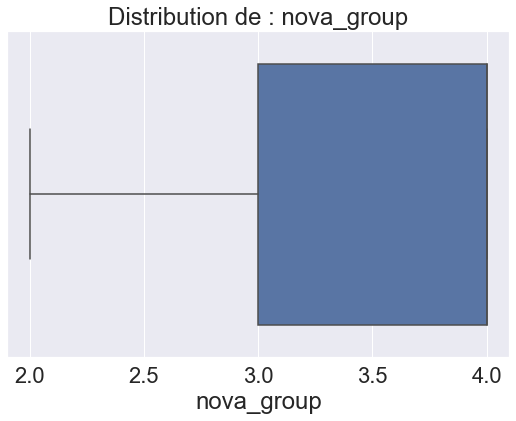

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


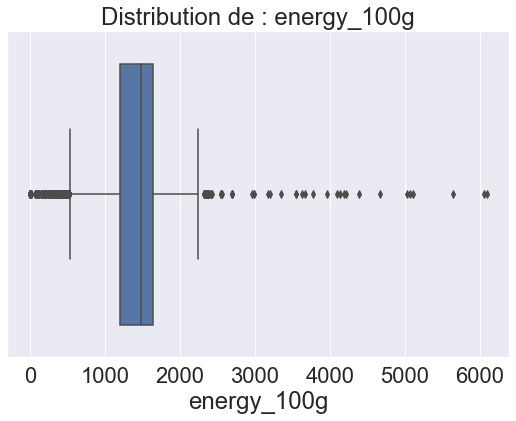

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


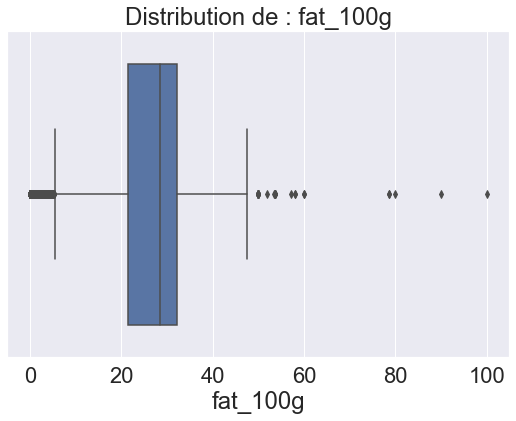

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


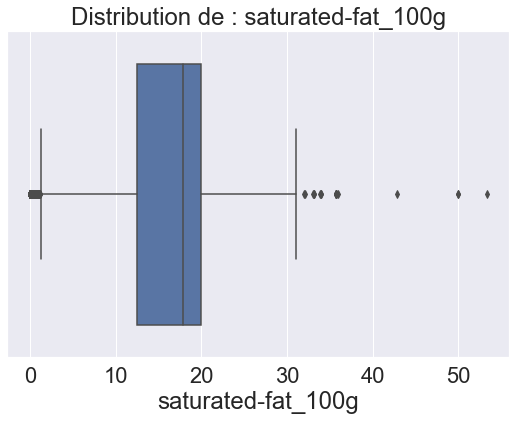

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


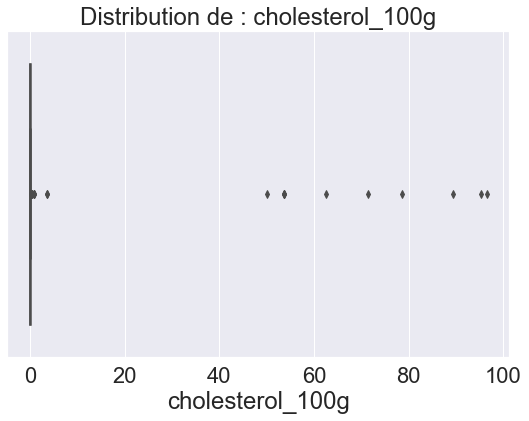

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


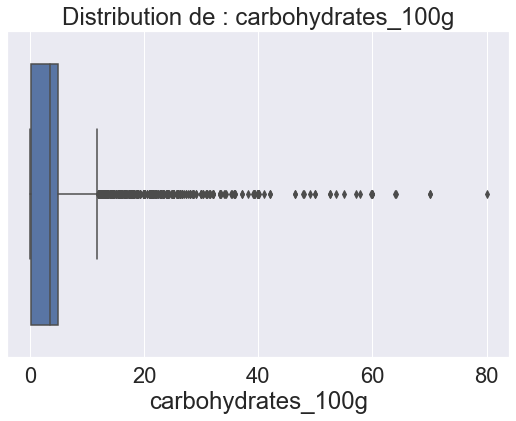

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


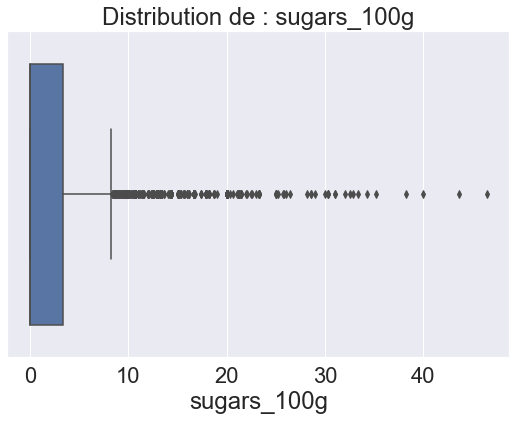

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


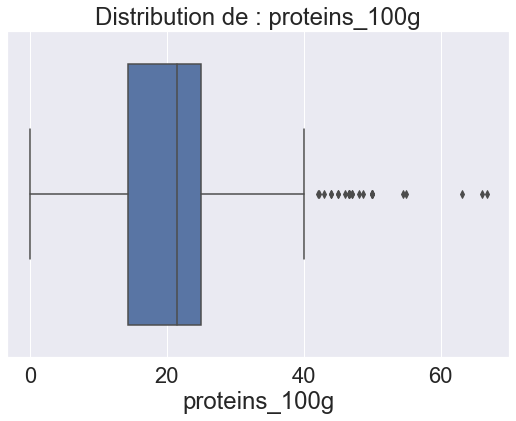

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


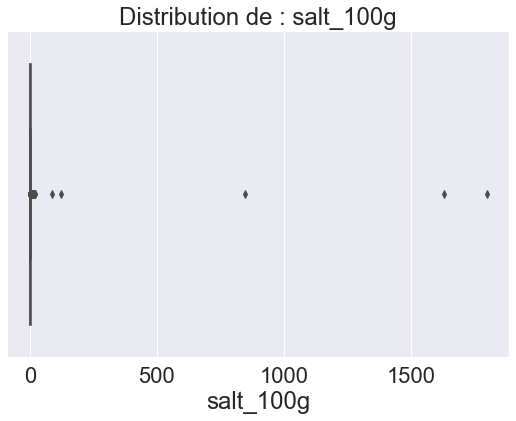

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


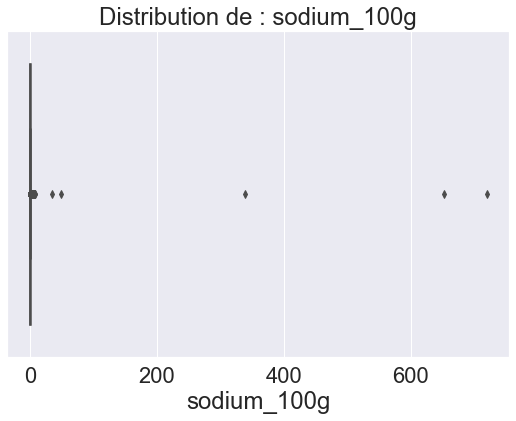

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


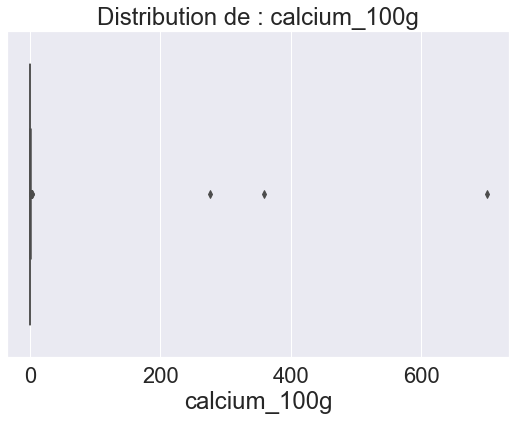

In [51]:
numeric_columns = df_fromages_clean.select_dtypes(include = ['float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (9,6))
    
    sns.boxplot(df_fromages_clean[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

### Traitement des valeurs aberrantes par la méthode "écart interquartile"

In [52]:
def find_all_outliers(v):
    Q1 = np.quantile(v, 0.25)  
    Q3 = np.quantile(v, 0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)    
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [53]:
Q1 = df_fromages_clean[numeric_columns].quantile(0.25)
Q3 = df_fromages_clean[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df_fromages_clean = df_fromages_clean[~((df_fromages_clean[numeric_columns] < (Q1 - 1.5 * IQR)) |(df_fromages_clean[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [54]:
df_fromages_clean.shape

(10544, 20)

Après la suppression des valeurs aberrantes, le nombre des lignes réduit à 6973 

### <span style='color:blue '> Imputation des valeurs manquantes </span>

- ### Imputation par la moyenne

Comme on l'a dit auparavant, pour les variables numeriques avec moins de 15% de valeurs manquantes, on fait une imputation par la moyenne par des groupes homogènes. 

- fat_100g

In [55]:
df_fromages_clean['fat_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['fat_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [56]:
df_fromages_clean['fat_100g'].isnull().sum()

0

- saturated-fat_100g

In [57]:
df_fromages_clean['saturated-fat_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['saturated-fat_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [58]:
df_fromages_clean['saturated-fat_100g'].isnull().sum()

0

- proteins_100g

In [59]:
df_fromages_clean['proteins_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['proteins_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [60]:
df_fromages_clean['proteins_100g'].isnull().sum()

0

- carbohydrates_100g

In [61]:
df_fromages_clean['carbohydrates_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['carbohydrates_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [62]:
df_fromages_clean['carbohydrates_100g'].isnull().sum()

0

- energy_100g

In [63]:
df_fromages_clean['energy_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['energy_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [64]:
df_fromages_clean['energy_100g'].isnull().sum()

0

- sodium_100g

In [65]:
df_fromages_clean['sodium_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['sodium_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [66]:
df_fromages_clean['sodium_100g'].isnull().sum()

0

- salt_100g

In [67]:
df_fromages_clean['salt_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['salt_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [68]:
df_fromages_clean['salt_100g'].isnull().sum()

0

- sugars_100g

In [69]:
df_fromages_clean['sugars_100g'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['sugars_100g']\
    .transform(lambda x: x.fillna(x.mean()))

In [70]:
df_fromages_clean['sugars_100g'].isnull().sum()

0

- nutriscore_score

In [71]:
df_fromages_clean['nutriscore_score'] = df_fromages_clean.groupby(['main_category','pnns_groups_2'])['nutriscore_score']\
    .transform(lambda x: x.fillna(x.mean()))

In [72]:
df_fromages_clean['nutriscore_score'].isnull().sum()

0

- ### Imputation par KNN

Pour les variables avec beaucoup de valeurs manquantes, on fait une imputation par KNN

In [73]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

- ### Calcium

In [74]:
df_fromages_train = df_fromages_clean.loc[df_fromages_clean['calcium_100g'].notnull(),]
df_fromages_test = df_fromages_clean.loc[df_fromages_clean['calcium_100g'].isnull(),]

In [75]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_fromages_train, test_size = 0.3)

x_train = train[['fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']]
           
y_train = train['calcium_100g']

x_test = test[['fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']]
y_test = test['calcium_100g']
x_predict = df_fromages_test[['fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']]

In [76]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train) 
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.10863164900515596
RMSE value for k=  2 is: 0.10100031709806753
RMSE value for k=  3 is: 0.09970496198856363
RMSE value for k=  4 is: 0.09937317816691646
RMSE value for k=  5 is: 0.10130332707612126
RMSE value for k=  6 is: 0.10332590265725335
RMSE value for k=  7 is: 0.10427555486569089
RMSE value for k=  8 is: 0.10478723307810923
RMSE value for k=  9 is: 0.10515198516226734
RMSE value for k=  10 is: 0.1057230677480979
RMSE value for k=  11 is: 0.10654052672112958
RMSE value for k=  12 is: 0.10710580323850544
RMSE value for k=  13 is: 0.10811342107708447
RMSE value for k=  14 is: 0.10904488297458995
RMSE value for k=  15 is: 0.10991250860918453
RMSE value for k=  16 is: 0.11095314354558321
RMSE value for k=  17 is: 0.11176387908813067
RMSE value for k=  18 is: 0.11224615431954119
RMSE value for k=  19 is: 0.11271587125048707
RMSE value for k=  20 is: 0.1134655591400813


On prend le K avec le RMSE le plus petit

<AxesSubplot:>

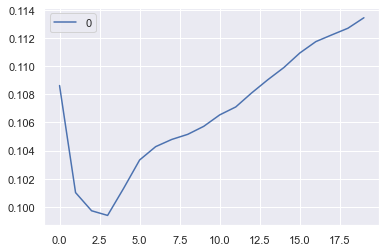

In [77]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [78]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

In [79]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [80]:
pred_calcium = model.predict(x_predict)

In [81]:
df_fromages_clean.loc[df_fromages_clean['calcium_100g'].isnull(), 'calcium_100g'] = pred_calcium

In [82]:
df_fromages_clean['calcium_100g'].isnull().sum()

0

- ### Cholesterol

In [83]:
df_fromages_train = df_fromages_clean.loc[df_fromages_clean['cholesterol_100g'].notnull(),]
df_fromages_test = df_fromages_clean.loc[df_fromages_clean['cholesterol_100g'].isnull(),]

In [84]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_fromages_train, test_size = 0.3)

x_train = train[['fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']]
           
y_train = train['cholesterol_100g']

x_test = test[['fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']]
y_test = test['cholesterol_100g']
x_predict = df_fromages_test[['fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']]

In [85]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train) 
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.01256217531666052
RMSE value for k=  2 is: 0.01159899030873535
RMSE value for k=  3 is: 0.011395389494521652
RMSE value for k=  4 is: 0.011350698526920567
RMSE value for k=  5 is: 0.011475563865210214
RMSE value for k=  6 is: 0.011619721117815543
RMSE value for k=  7 is: 0.011783969696732208
RMSE value for k=  8 is: 0.011821788004727607
RMSE value for k=  9 is: 0.011940230357594067
RMSE value for k=  10 is: 0.01204054792028442
RMSE value for k=  11 is: 0.01217011152526341
RMSE value for k=  12 is: 0.01227618195089566
RMSE value for k=  13 is: 0.012411793131199726
RMSE value for k=  14 is: 0.01249180741211851
RMSE value for k=  15 is: 0.012560272051767019
RMSE value for k=  16 is: 0.01262275243991458
RMSE value for k=  17 is: 0.012702909493907625
RMSE value for k=  18 is: 0.012767534166950338
RMSE value for k=  19 is: 0.012826571030955454
RMSE value for k=  20 is: 0.012888816649123029


<AxesSubplot:>

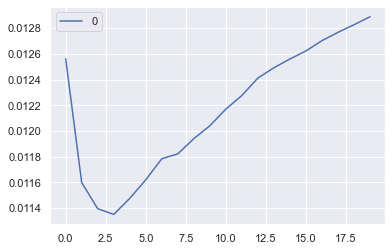

In [86]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [87]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

In [88]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [89]:
pred_cholesterol = model.predict(x_predict)
df_fromages_clean.loc[df_fromages_clean['cholesterol_100g'].isnull(), 'cholesterol_100g'] = pred_cholesterol

In [90]:
df_fromages_clean['cholesterol_100g'].isnull().sum()

0

### Observation des variables numériques après l'imputation

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev


Traitement de la variable  calcium_100g
Moyenne (Avant / Après) :  0.6942  /  0.6198709998340255
Ecart-Type (Avant / Après) :  0.3465807265270243  /  0.22744511067432066


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  cholesterol_100g
Moyenne (Avant / Après) :  0.09780000000000001  /  0.08660119499241693
Ecart-Type (Avant / Après) :  0.0069785385289471554  /  0.021339340907209545


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  fat_100g
Moyenne (Avant / Après) :  22.688  /  27.897175241724202
Ecart-Type (Avant / Après) :  9.534711322321195  /  6.0423246601418965


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  proteins_100g
Moyenne (Avant / Après) :  19.612000000000002  /  21.896325531219233
Ecart-Type (Avant / Après) :  13.236945266941312  /  6.144943210437373


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  saturated-fat_100g
Moyenne (Avant / Après) :  15.514  /  17.53117084456248
Ecart-Type (Avant / Après) :  7.8964029785719525  /  4.198834644806546

Traitement de la variable  carbohydrates_100g
Moyenne (Avant / Après) :  2.878  /  2.653133821837278
Ecart-Type (Avant / Après) :  5.206958805291242  /  2.3963820518398053


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev


Traitement de la variable  energy_100g
Moyenne (Avant / Après) :  1342.4  /  1456.5361659013424
Ecart-Type (Avant / Après) :  495.2522589549693  /  248.93861419204458

Traitement de la variable 

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 sodium_100g
Moyenne (Avant / Après) :  0.7448  /  0.627541627650961
Ecart-Type (Avant / Après) :  0.657780510504834  /  0.18058357784247264


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  salt_100g
Moyenne (Avant / Après) :  1.862  /  1.5688472779558413
Ecart-Type (Avant / Après) :  1.6444512762620849  /  0.4514561484516204


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev


Traitement de la variable  sugars_100g
Moyenne (Avant / Après) :  2.34  /  0.7868057549437776
Ecart-Type (Avant / Après) :  4.957620396924314  /  1.5720767818647001

Traitement de la variable  nutriscore_score
Moyenne (Avant / Après) :  13.8  /  15.151211532562943
Ecart-Type (Avant / Après) :  6.723094525588644  /  2.118901314669654


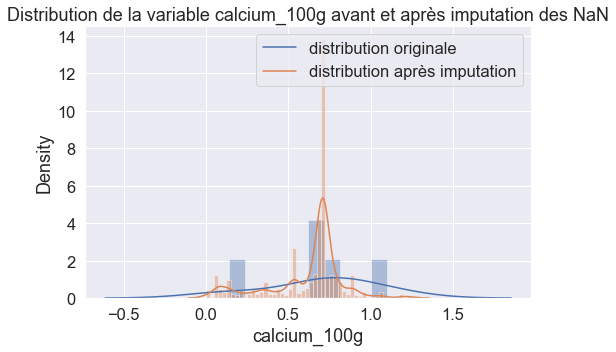

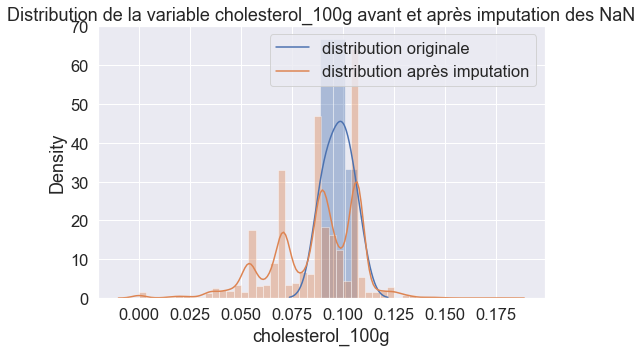

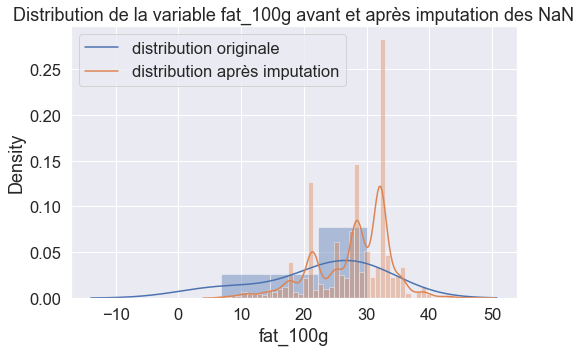

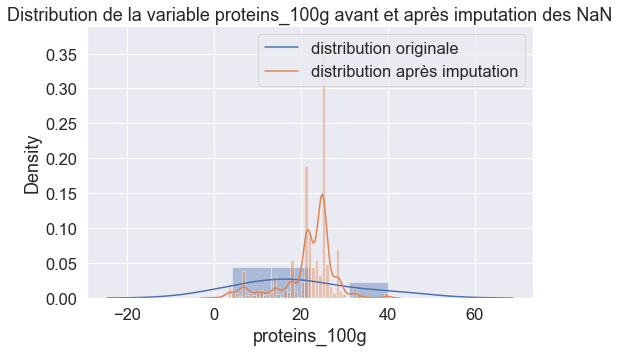

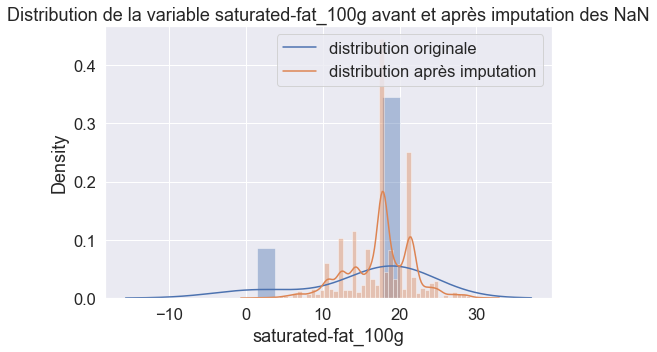

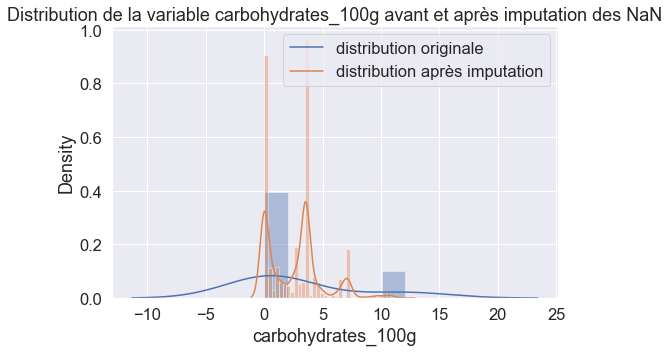

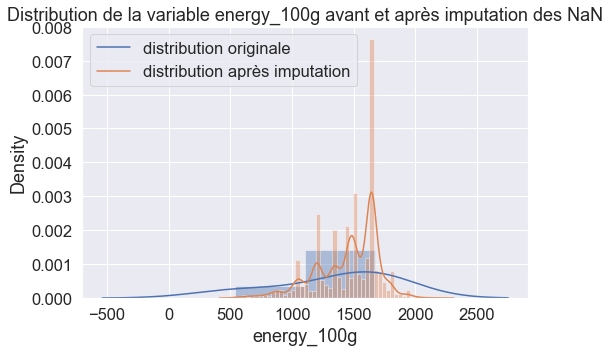

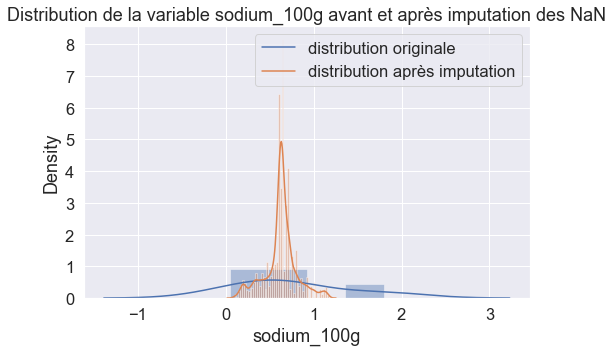

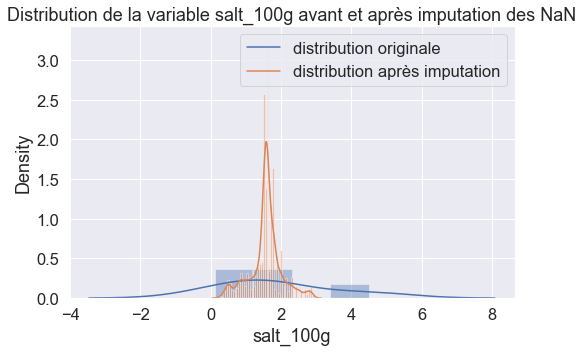

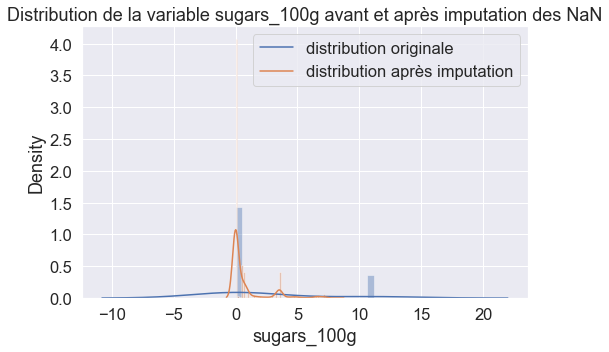

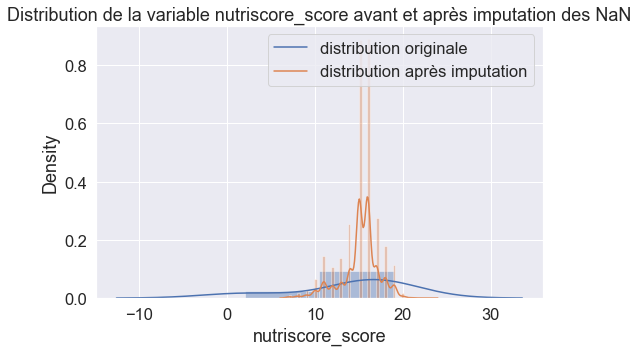

In [91]:
sns.set(font_scale=1.5)
for column in ['calcium_100g','cholesterol_100g','fat_100g','proteins_100g','saturated-fat_100g','carbohydrates_100g','energy_100g','sodium_100g','salt_100g','sugars_100g','nutriscore_score']:
    plt.figure(figsize=(8,5))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(df_fromages[column].dropna().head())
    sns.distplot(df_fromages_clean[column].dropna())
    plt.legend(['distribution originale', 'distribution après imputation'])
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', df_fromages[column].dropna().head().mean(), ' / ', df_fromages_clean[column].mean())
    print('Ecart-Type (Avant / Après) : ', df_fromages[column].dropna().head().std(), ' / ', df_fromages_clean[column].std())
sns.set(font_scale=1)

Lorsque l’on regarde l'impact de l'imputation sur la moyenne et l'écart type, on constate de fortes disparités 

### <span style='color:blue '> Taille du jeu final comparée à la taille du jeu initial </span>

In [92]:
taille_jeux = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           df_fromages_clean.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             df_fromages_clean.isna().sum().sum()/
                             df_fromages_clean.shape[0] / 
                             df_fromages_clean.shape[1]*100]
                           })

In [93]:
 taille_jeux

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(1806889, 181)",79.048779
1,données nettoyées,"(10544, 20)",3.069044


 ### <span style='color:blue '> Export du fichier nettoyé </span>

In [94]:
df_fromages_clean.to_csv('products_cleaned.csv', index=False)